In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data_1_raw = np.loadtxt("/content/data1.csv", skiprows=1, delimiter=",", dtype=np.float32)
data_2_raw = np.loadtxt("/content/data2.csv", skiprows=1, delimiter=",", dtype=np.float32)

In [3]:
data_1_raw.shape, data_2_raw.shape

((200, 3), (200, 4))

In [4]:
data_1=torch.tensor(data_1_raw)
data_2=torch.tensor(data_2_raw)

data_1.shape, data_2.shape

(torch.Size([200, 3]), torch.Size([200, 4]))

# 2.1 Processing Data 1 and 2

In [5]:
x=data_1[:,:-1]
y=data_1[:,-1:].long()

y[y==-1]=0
x.shape, y.shape

(torch.Size([200, 2]), torch.Size([200, 1]))

In [6]:
200*0.8

160.0

In [7]:
x_train, y_train, x_test, y_test=x[:161],y[:161],x[161:],y[161:]

In [8]:
x_train, y_train=x_train.numpy().T, y_train.numpy().T

In [9]:
x_train.shape, y_train.shape

((2, 161), (1, 161))

In [10]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

def relu(x):
  return np.maximum(0,x)

def tanh(x):
  return np.tanh(x)

def drelu(x):
  return (x>0).astype(float)

def dtanh(x):
  return (1-(tanh(x)**2))

def compute_loss(y,a2):
  m=y.shape[1]
  loss=-1/m * np.sum(y*np.log(a2 + 1e-8) + (1-y)*np.log(1-a2 + 1e-8))
  return loss

In [11]:
def init_weights(n_x,n_h,n_y):
  np.random.seed(42)
  w1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  w2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  return {"w1":w1, "w2":w2, "b1":b1, "b2":b2}

In [12]:
def forward(x,params,a):
  w1,b1=params["w1"],params["b1"]
  w2,b2=params["w2"],params["b2"]
  z1=np.dot(w1,x)+b1

  if a=="relu":
    a1=relu(z1)

  elif a=="tanh":
    a1=tanh(z1)

  z2=np.dot(w2,a1)+b2
  a2=sigmoid(z2)

  vals={"z1":z1, "a1":a1, "z2":z2, "a2":a2}

  return a2,vals

In [13]:
def backward(x,y,params,vals,a):
  m=x.shape[1]
  w2=params["w2"]
  a1=vals["a1"]
  a2=vals["a2"]
  z1=vals["z1"]

  dz2=a2-y
  dw2=(1/m)*np.dot(dz2,a1.T)
  db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)

  if a=="relu":
    dz1=np.dot(w2.T,dz2)*drelu(z1)
  elif a=="tanh":
    dz1=np.dot(w2.T,dz2)*dtanh(z1)

  dw1=(1/m)*np.dot(dz1,x.T)
  db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)

  grads={"dw1":dw1,"db1":db1,"dw2":dw2,"db2":db2}
  return grads

In [14]:
def update_params(params,grads,lr):
  params["w1"]-=lr*grads["dw1"]
  params["b1"]-=lr*grads["db1"]
  params["w2"]-=lr*grads["dw2"]
  params["b2"]-=lr*grads["db2"]

  return params

In [15]:
def train(x,y,n_h,a,lr,epochs):
  n_x=x.shape[0]
  n_y=1
  params=init_weights(n_x,n_h,n_y)
  print("W2 shape:", params["w2"].shape)

  l=[]

  for i in range(1000):
    a2,vals=forward(x,params,a)
    loss=compute_loss(y,a2)
    grads=backward(x,y,params,vals,a)
    params=update_params(params,grads,lr)

    l.append(loss)
    print(f"Epoch {i}, Loss: {loss:.2f}")

  return params,l

In [16]:
def predict(x, params, a):
    a2, _ = forward(x, params, a)
    return (a2 > 0.5).astype(int)

In [17]:
def plot_decision_boundary(X, Y, parameters, activation_hidden):

    x_min, x_max = X[0, :].min()-1, X[0, :].max()+1
    y_min, y_max = X[1, :].min()-1, X[1, :].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()].T
    Z = predict(grid, parameters, activation_hidden)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[0, :], X[1, :], c=Y.flatten())
    plt.title("Decision Boundary")
    plt.show()


Training Data 1 (ReLU, 2 neurons)
W2 shape: (1, 2)
Epoch 0, Loss: 0.69
Epoch 1, Loss: 0.69
Epoch 2, Loss: 0.69
Epoch 3, Loss: 0.69
Epoch 4, Loss: 0.69
Epoch 5, Loss: 0.69
Epoch 6, Loss: 0.68
Epoch 7, Loss: 0.68
Epoch 8, Loss: 0.67
Epoch 9, Loss: 0.66
Epoch 10, Loss: 0.63
Epoch 11, Loss: 0.58
Epoch 12, Loss: 0.53
Epoch 13, Loss: 0.50
Epoch 14, Loss: 0.48
Epoch 15, Loss: 0.47
Epoch 16, Loss: 0.47
Epoch 17, Loss: 0.47
Epoch 18, Loss: 0.47
Epoch 19, Loss: 0.47
Epoch 20, Loss: 0.46
Epoch 21, Loss: 0.46
Epoch 22, Loss: 0.46
Epoch 23, Loss: 0.46
Epoch 24, Loss: 0.46
Epoch 25, Loss: 0.46
Epoch 26, Loss: 0.46
Epoch 27, Loss: 0.46
Epoch 28, Loss: 0.46
Epoch 29, Loss: 0.46
Epoch 30, Loss: 0.46
Epoch 31, Loss: 0.46
Epoch 32, Loss: 0.46
Epoch 33, Loss: 0.46
Epoch 34, Loss: 0.46
Epoch 35, Loss: 0.46
Epoch 36, Loss: 0.46
Epoch 37, Loss: 0.46
Epoch 38, Loss: 0.46
Epoch 39, Loss: 0.46
Epoch 40, Loss: 0.46
Epoch 41, Loss: 0.46
Epoch 42, Loss: 0.46
Epoch 43, Loss: 0.46
Epoch 44, Loss: 0.46
Epoch 45, Los

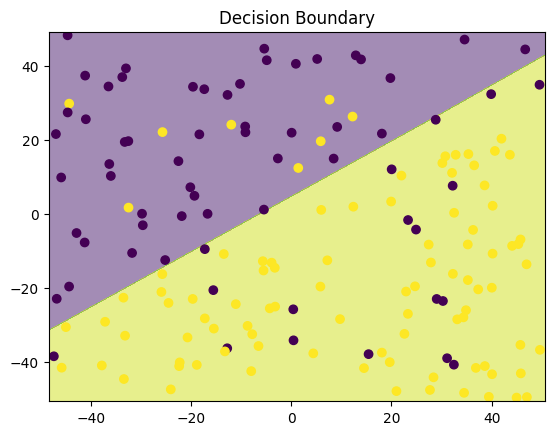

In [18]:
print("\nTraining Data 1 (ReLU, 2 neurons)")
params1, losses1 = train(x_train, y_train,
                         n_h=2,
                         a="relu",
                         lr=0.1,
                         epochs=1000)

plot_decision_boundary(x_train, y_train, params1, "relu")

In [43]:
x2=data_2[:,:-1]
y2=data_2[:,-1:].long()

y2[y2==-1]=0
x2.shape, y2.shape

x_train, y_train, x_test, y_test=x2[:161],y2[:161],x2[161:],y2[161:]
x_train, y_train=x_train.numpy().T, y_train.numpy().T
x_test, y_test=x_test.numpy().T, y_test.numpy().T

In [44]:
y_test.reshape(-1).shape, x_test.reshape(-1).shape

((39,), (117,))


Training Data 2 (ReLU, 2 neurons)
W2 shape: (1, 2)
Epoch 0, Loss: 0.69
Epoch 1, Loss: 0.69
Epoch 2, Loss: 0.69
Epoch 3, Loss: 0.69
Epoch 4, Loss: 0.69
Epoch 5, Loss: 0.68
Epoch 6, Loss: 0.68
Epoch 7, Loss: 0.66
Epoch 8, Loss: 0.65
Epoch 9, Loss: 0.63
Epoch 10, Loss: 0.62
Epoch 11, Loss: 0.61
Epoch 12, Loss: 0.60
Epoch 13, Loss: 0.60
Epoch 14, Loss: 0.60
Epoch 15, Loss: 0.59
Epoch 16, Loss: 0.59
Epoch 17, Loss: 0.59
Epoch 18, Loss: 0.59
Epoch 19, Loss: 0.58
Epoch 20, Loss: 0.58
Epoch 21, Loss: 0.58
Epoch 22, Loss: 0.58
Epoch 23, Loss: 0.58
Epoch 24, Loss: 0.58
Epoch 25, Loss: 0.57
Epoch 26, Loss: 0.57
Epoch 27, Loss: 0.57
Epoch 28, Loss: 0.57
Epoch 29, Loss: 0.57
Epoch 30, Loss: 0.57
Epoch 31, Loss: 0.56
Epoch 32, Loss: 0.56
Epoch 33, Loss: 0.56
Epoch 34, Loss: 0.56
Epoch 35, Loss: 0.56
Epoch 36, Loss: 0.56
Epoch 37, Loss: 0.56
Epoch 38, Loss: 0.56
Epoch 39, Loss: 0.55
Epoch 40, Loss: 0.55
Epoch 41, Loss: 0.55
Epoch 42, Loss: 0.55
Epoch 43, Loss: 0.55
Epoch 44, Loss: 0.55
Epoch 45, Los

<Axes: >

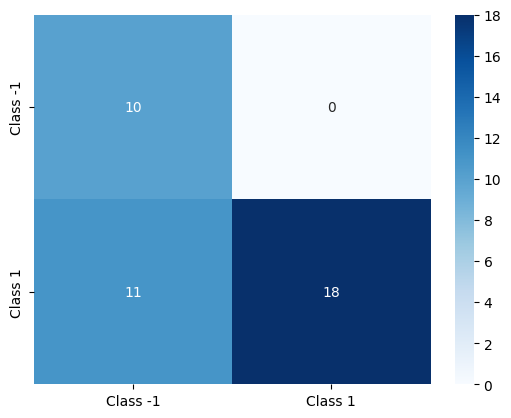

In [47]:
print("\nTraining Data 2 (ReLU, 2 neurons)")
params1, losses1 = train(x_train, y_train,
                         n_h=2,
                         a="relu",
                         lr=0.1,
                         epochs=1000)
conf=confusion_matrix(y_test.flatten(),predict(x_test,params1,"relu").reshape(-1))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
# plot_decision_boundary(x_train, y_train, params1, "relu")

# 2.2 Processing data 3,4 and 5

In [19]:
data_3=np.loadtxt("/content/data3.csv",skiprows=1, delimiter=",", dtype=np.float32)
data_4=np.loadtxt("/content/data4.csv",skiprows=1, delimiter=",", dtype=np.float32)
data_5=np.loadtxt("/content/data5.csv",skiprows=1, delimiter=",", dtype=np.float32)

In [20]:
data_3.shape, data_4.shape, data_5.shape

((171, 4), (200, 3), (200, 3))

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    a = sigmoid(x)
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return (x > 0).astype(float)

def softmax(x):
    expz = np.exp(x - np.max(x, axis=1, keepdims=True))
    return expz / np.sum(expz, axis=1, keepdims=True)

def mse(y_hat, y):
    return np.mean((y_hat - y) ** 2)

def cross_entropy(y_hat, y):
    m = y.shape[0]
    return -np.sum(y * np.log(y_hat + 1e-9)) / m

In [22]:
class MLP:
    def __init__(self, n_input, n_hidden, n_output, t='regression', lr=0.01):
        self.n_input = n_input
        self.n_hidden = n_hidden

        self.n_output = n_output
        self.lr = lr

        self.t = t

        self.w1 = np.random.randn(n_input, n_hidden) * np.sqrt(2. / n_input)
        self.b1 = np.zeros((1, n_hidden))
        self.w2 = np.random.randn(n_hidden, n_output) * np.sqrt(2. / n_hidden)
        self.b2 = np.zeros((1, n_output))

    def forward(self, x):
        self.z1 = x @ self.w1 + self.b1
        self.a1 = relu(self.z1)

        self.z2 = self.a1 @ self.w2 + self.b2

        if self.t == 'binary':
            self.a2 = sigmoid(self.z2)
        elif self.t == 'multiclass':
            self.a2 = softmax(self.z2)
        else:
            self.a2 = self.z2
        return self.a2

    def backward(self, x, y):
        m = x.shape[0]
        if self.t == 'binary':
            dz2 = self.a2 - y
        elif self.t == 'multiclass':
            dz2 = self.a2 - y
        else:
            dz2 = (self.a2- y)

        dw2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        da1 = dz2 @ self.w2.T
        dz1 = da1 * drelu(self.z1)
        dw1 = x.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        self.w1 -= self.lr * dw1
        self.b1 -= self.lr * db1
        self.w2 -= self.lr * dw2
        self.b2 -= self.lr * db2

    def compute_loss(self, y_hat, y):
        if self.t == 'binary' or self.t == 'multiclass':
            return cross_entropy(y_hat, y)
        else:
            return mse(y_hat, y)

    def fit(self, x, y, epochs=1000, tol=1e-5, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            y_hat = self.forward(x)
            loss = self.compute_loss(y_hat, y)
            loss_history.append(loss)
            self.backward(x,y)

            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.5f}")

            if epoch > 10 and abs(loss_history[-2] - loss_history[-1]) < tol:
                break
        return loss_history

    def predict(self, x):
        y_hat = self.forward(x)
        if self.t == 'binary':
            return (y_hat > 0.5).astype(int)
        elif self.t == 'multiclass':
            return np.argmax(y_hat, axis=1)
        else:
            return y_hat

    def plot_predictions(self, y, pred, step=0.01):
        plt.scatter(y, pred)
        plt.xlabel("True Y")
        plt.ylabel("Predicted Y")
        plt.title("Data 5 Predictions")
        plt.show()

Epoch 0: Loss = 3.84368
Epoch 100: Loss = 0.09941
Epoch 200: Loss = 0.06914
Epoch 300: Loss = 0.05565
Epoch 400: Loss = 0.04799
Epoch 500: Loss = 0.04298
Epoch 600: Loss = 0.03941
Epoch 700: Loss = 0.03673
Epoch 800: Loss = 0.03462
Epoch 900: Loss = 0.03283


<Axes: >

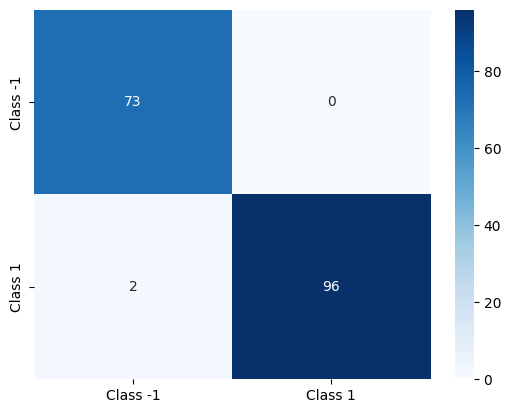

In [23]:
# DATA 3: binary classification, 3 features
np.random.seed(42)
x3=data_3[:,:-1]
y3=data_3[:,-1:]
y3[y3==-1]=0
mlp3 = MLP(n_input=3, n_hidden=10, n_output=1, t='binary', lr=0.01)
loss3 = mlp3.fit(x3, y3, epochs=1000)
pred3 = mlp3.predict(x3)
conf = confusion_matrix(y3,pred3)
class_names = ["Class -1", "Class 1"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
# print("Data 3 Accuracy:", np.mean(pred3 == y3))


Epoch 0: Loss = 15.24686
Epoch 100: Loss = 1.38803
Epoch 200: Loss = 1.38093
Epoch 300: Loss = 1.37734
Epoch 400: Loss = 1.37529


<Axes: >

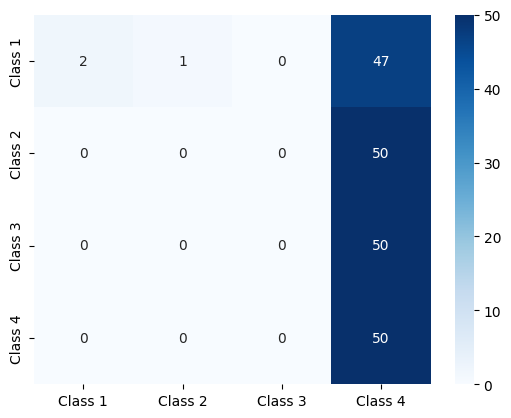

In [24]:
X4 = data_4[:, :-1].astype(float)
Y4 = data_4[:, -1].astype(int)
Y4 = Y4 - 1
X4.shape, Y4.shape
Y4_onehot = np.zeros((Y4.size, 4))
Y4_onehot[np.arange(Y4.size), Y4] = 1
Y4_onehot.shape
mlp4 = MLP(n_input=2, n_hidden=10, n_output=4, t='multiclass', lr=0.01)
loss4 = mlp4.fit(X4, Y4_onehot, epochs=1000)
pred4 = mlp4.predict(X4)
conf = confusion_matrix(Y4, pred4)
class_names = ["Class 1", "Class 2", "Class 3", "Class 4"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

Epoch 0: Loss = 566.65497
Epoch 100: Loss = 17.70274
Epoch 200: Loss = 15.81787
Epoch 300: Loss = 15.29656
Epoch 400: Loss = 15.01737
Epoch 500: Loss = 14.87704
Epoch 600: Loss = 14.82089
Data 5 MSE: 14.80772273591247


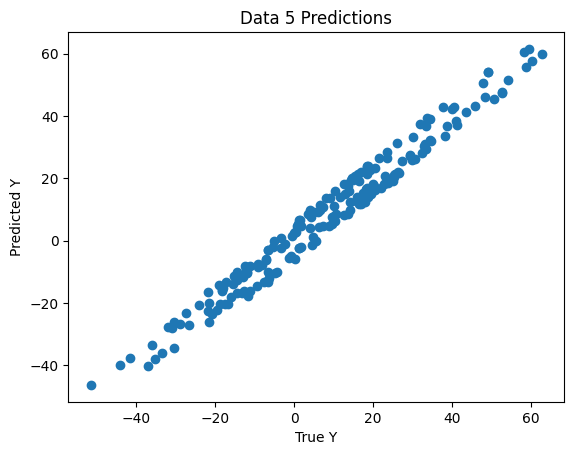

In [25]:
X5 = data_5[:,:-1]
Y5 = data_5[:,-1:]
mlp5 = MLP(n_input=2, n_hidden=10, n_output=1, t='regression', lr=0.01)
loss5 = mlp5.fit(X5, Y5, epochs=1000)
pred5 = mlp5.predict(X5)
print("Data 5 MSE:", mse(pred5, Y5))

plt.scatter(Y5, pred5)
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("Data 5 Predictions")
plt.show()


# 2.3 Processing Data 6 and 7

In [50]:
data_6=np.loadtxt("/content/data6.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_7=np.loadtxt("/content/data7.csv",skiprows=1,delimiter=",",dtype=np.float32)

In [51]:
data_6.shape, data_7.shape

((200, 3), (200, 5))

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    a = sigmoid(x)
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return (x > 0).astype(float)

def mse(y_hat, y):
    return np.mean((y_hat - y) ** 2)

def cross_entropy(y_hat, y):
    m = y.shape[0]
    return -np.sum(y * np.log(y_hat + 1e-9)) / m

In [53]:
class MLP:
    def __init__(self, layer_sizes, t='regression', lr=0.01):
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.t = t
        self.num_layers = len(layer_sizes) - 1
        self.weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2 / layer_sizes[i])
                        for i in range(self.num_layers)]
        self.biases = [np.zeros((1, layer_sizes[i+1])) for i in range(self.num_layers)]
    def forward(self, x):
        self.a = [x]
        self.z = []
        for i in range(self.num_layers - 1):
            z_i = self.a[-1] @ self.weights[i] + self.biases[i]
            a_i = relu(z_i)
            self.z.append(z_i)
            self.a.append(a_i)
        z_out = self.a[-1] @ self.weights[-1] + self.biases[-1]
        if self.t == 'binary':
            a_out = sigmoid(z_out)
        else:
            a_out = z_out
        self.z.append(z_out)
        self.a.append(a_out)
        return a_out
    def backward(self, x, y):
        m = x.shape[0]
        if self.t == 'binary' or self.t == 'regression':
            dz = self.a[-1] - y
        for i in reversed(range(self.num_layers)):
            dw = self.a[i].T @ dz / m
            db = np.sum(dz, axis=0, keepdims=True) / m
            if i > 0:
                da = dz @ self.weights[i].T
                dz = da * drelu(self.z[i-1])
            self.weights[i] -= self.lr * dw
            self.biases[i] -= self.lr * db
    def compute_loss(self, y_hat, y):
        if self.t == 'binary':
            return cross_entropy(y_hat, y)
        else:
            return mse(y_hat, y)
    def fit(self, x, y, epochs=1000, tol=1e-5, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            y_hat = self.forward(x)
            loss = self.compute_loss(y_hat, y)
            loss_history.append(loss)
            self.backward(x, y)
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.5f}")
            if epoch > 10 and abs(loss_history[-2] - loss_history[-1]) < tol:
                break
        return loss_history
    def predict(self, x):
        y_hat = self.forward(x)
        if self.t == 'binary':
            return (y_hat > 0.5).astype(int)
        else:
            return y_hat
    def plot_predictions(self, y, pred):
        plt.scatter(y, pred)
        plt.xlabel("True Y")
        plt.ylabel("Predicted Y")
        plt.title("Predictions")
        plt.show()


Epoch 0: Loss = 8.11508
Epoch 100: Loss = 0.40523
Epoch 200: Loss = 0.37497
Epoch 300: Loss = 0.35439


<Axes: >

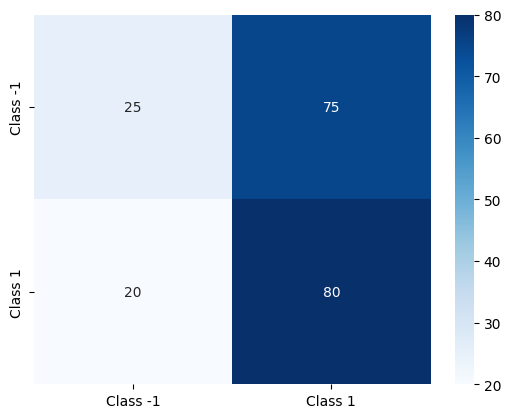

In [54]:
# DATA 6: binary classification, 3 features
np.random.seed(42)
x6=data_6[:,:-1]
y6=data_6[:,-1:]
y6[y6==-1]=0
input_dim = 2
mlp6 = MLP(layer_sizes=[input_dim, 2, 2, 1], t='binary', lr=0.01)
mlp6.fit(x6, y6, epochs=1000)
pred6 = mlp6.predict(x6)
conf = confusion_matrix(y6,pred6)
class_names = ["Class -1", "Class 1"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
# print("Data 3 Accuracy:", np.mean(pred3 == y3))

Epoch 0: Loss = 1.39158


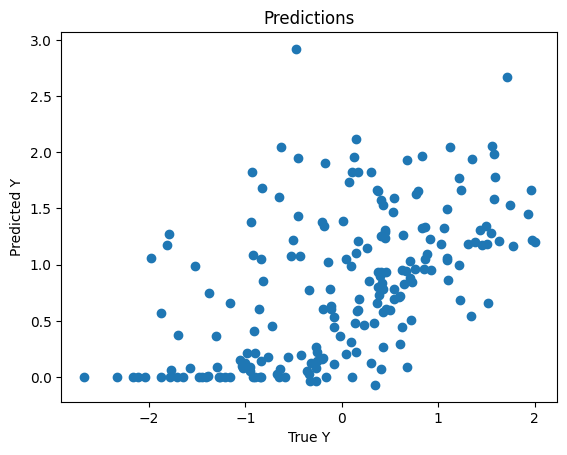

Data 7 RMSE: 134521.53628458307


In [76]:
# DATA 7: Regression, 4 features
x7 = data_7[:, :-1]
y7 = data_7[:, -1:].reshape(-1, 1)

x7_mean=x7.mean(axis=0)
x7_std=x7.std(axis=0)
x7_norm=(x7-x7_mean)/x7_std

y7_mean=y7.mean()
y7_std=y7.std()
y7_norm=(y7-y7_mean)/y7_std

input_dim = x7.shape[1]
mlp7 = MLP(layer_sizes=[input_dim, 4, 3, 3, 2, 1], t='regression', lr=0.0000005)
mlp7.fit(x7_norm, y7_norm, epochs= 25)
pred7 = mlp7.predict(x7_norm)
mlp7.plot_predictions(y7_norm, pred7)
rmse7 = np.sqrt(np.mean((pred7 - y7)**2))
print("Data 7 RMSE:", rmse7)

# 3. Keras Implementation

In [164]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For model class for Data 1 to 7

In [146]:
#data_1
data_1=np.loadtxt("/content/data1.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_1.shape

(200, 3)

In [147]:
x=data_1[:,:-1]
y=data_1[:,-1:]
y[y==-1]=0
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6938 - loss: 2.4208  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8713 - loss: 0.5021 
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.4632 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8729 - loss: 0.4246 
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8458 - loss: 0.4491 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8149 - loss: 0.4546 
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8557 - loss: 0.3688 
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7957 - loss: 0.5030 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.4629 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.4524 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.3971 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8854 - l

<Axes: >

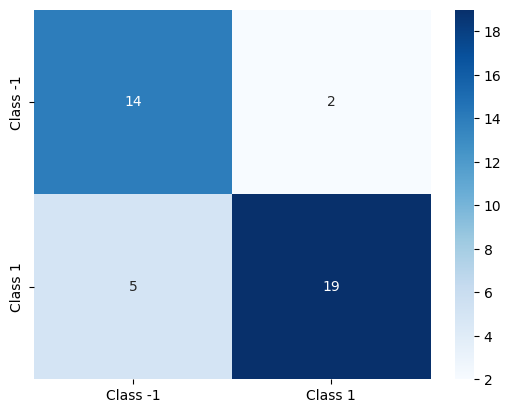

In [148]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=30,batch_size=10)
preds=(model.predict(x_test)>0.5).astype(int)
conf=confusion_matrix(y_test,preds)
class_names=["Class -1", "Class 1"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

In [149]:
#data_2
data_2=np.loadtxt("/content/data2.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_2.shape

(200, 4)

In [152]:
x=data_2[:,:-1]
y=data_2[:,-1:]
y[y==-1]=0
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5727 - loss: 1.8350  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.7528 
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.5328 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.3823 
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 0.3692 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8395 - loss: 0.3845 
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8258 - loss: 0.3997 
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8874 - loss: 0.3092 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 - loss: 0.3006 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.4689 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.3087 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

<Axes: >

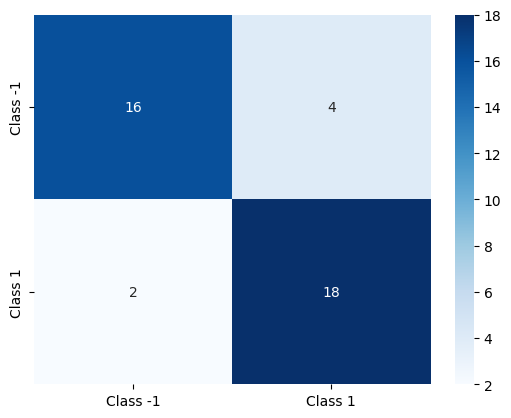

In [153]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=30,batch_size=10)
preds=(model.predict(x_test)>0.5).astype(int)
conf=confusion_matrix(y_test,preds)
class_names=["Class -1", "Class 1"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

In [154]:
#data_3
data_3=np.loadtxt("/content/data3.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_3.shape

(171, 4)

In [156]:
x=data_3[:,:-1]
y=data_3[:,-1:]
y[y==-1]=0
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7105 - loss: 0.6286  
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8080 - loss: 0.5020 
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8923 - loss: 0.4221 
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9321 - loss: 0.3459 
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9455 - loss: 0.2965 
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.2514 
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - loss: 0.2231 
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9893 - loss: 0.2036 
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.1945 
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.1734 
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.1667 
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - l

<Axes: >

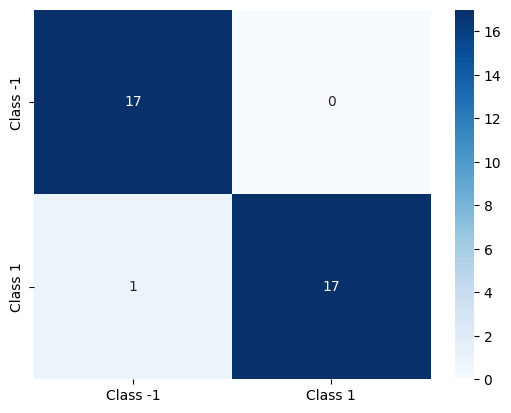

In [157]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=30,batch_size=10)
preds=(model.predict(x_test)>0.5).astype(int)
conf=confusion_matrix(y_test,preds)
class_names=["Class -1", "Class 1"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

In [166]:
#data_4
data_4=np.loadtxt("/content/data4.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_4.shape

(200, 3)

In [167]:
x=data_4[:,:-1]
y=data_4[:,-1:].flatten()
y[y==1]=0
y[y==2]=1
y[y==3]=2
y[y==4]=3
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [168]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1416 - loss: 1.5008  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0983 - loss: 1.4848 
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1545 - loss: 1.4356     
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1484 - loss: 1.4060 
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2088 - loss: 1.3798 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3188 - loss: 1.3588 
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5069 - loss: 1.3448 
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5964 - loss: 1.3035 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5841 - loss: 1.2953 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6150 - loss: 1.2491 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5988 - loss: 1.2422 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5869

<Axes: >

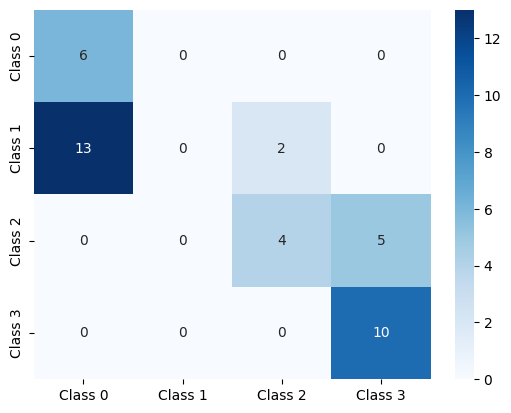

In [169]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=30,batch_size=10)
preds=model.predict(x_test)
pred_labels=preds.argmax(axis=1)
conf=confusion_matrix(y_test,pred_labels)
class_names=["Class 0", "Class 1", "Class 2", "Class 3"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

In [172]:
#data_5
data_5=np.loadtxt("/content/data5.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_5.shape

(200, 3)

In [173]:
x=data_5[:,:-1]
y=data_5[:,-1:].flatten()
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [174]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 471.2017 - mse: 471.2017  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 324.6974 - mse: 324.6974 
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197.8790 - mse: 197.8790 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.5466 - mse: 155.5466
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223.3853 - mse: 223.3853 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 119.6939 - mse: 119.6939 
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 157.5038 - mse: 157.5038
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 329.4372 - mse: 329.4372 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 352.3966 - mse: 352.3966 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274.4232 - mse: 274.4232 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299.9853 - mse: 299.9853 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308.2398 - mse: 308.2398 
E

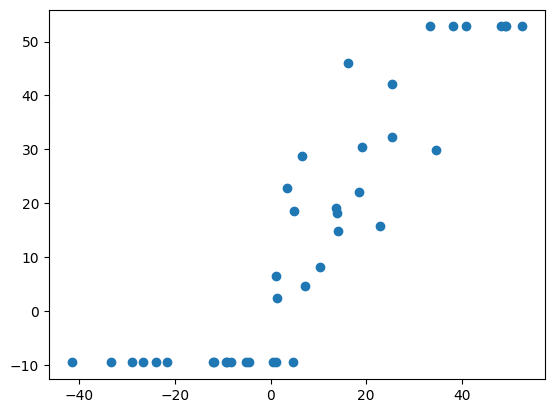

In [175]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(
    optimizer="sgd",
    loss="mse",
    metrics=["mse"]
)

model.fit(x_train,y_train,epochs=30,batch_size=10)
preds=model.predict(x_test)
plt.scatter(y_test,preds)

In [185]:
#data_6
data_6=np.loadtxt("/content/data6.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_6.shape

(200, 3)

In [186]:
x=data_6[:,:-1]
y=data_6[:,-1:]
y[y==-1]=0
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5880 - loss: 6.4260  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5072 - loss: 0.9490 
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5725 - loss: 0.7692 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5600 - loss: 0.7203 
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5344 - loss: 0.7106 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5357 - loss: 0.6956  
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5682 - loss: 0.6838 
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5950 - loss: 0.6789 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5901 - loss: 0.6748 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5940 - loss: 0.6887 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5290 - loss: 0.6924 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5948 - 

<Axes: >

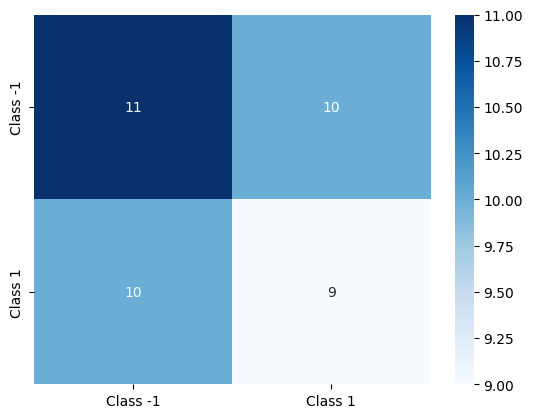

In [187]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=30,batch_size=10)
preds=(model.predict(x_test)>0.5).astype(int)
conf=confusion_matrix(y_test,preds)
class_names=["Class -1", "Class 1"]
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

In [195]:
#data_7
data_7=np.loadtxt("/content/data7.csv",skiprows=1,delimiter=",",dtype=np.float32)
data_7.shape

(200, 5)

In [196]:
x=data_7[:,:-1]
y=data_7[:,-1:].flatten()
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [201]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

y_train_scaled = st.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = st.transform(y_test.reshape(-1, 1)).flatten()

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0187 - mse: 1.0187  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7137 - mse: 0.7137 
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5248 - mse: 0.5248 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3282 - mse: 0.3282 
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2470 - mse: 0.2470 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1942 - mse: 0.1942 
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1509 - mse: 0.1509 
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0950 - mse: 0.0950 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0981 - mse: 0.0981 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0794 - mse: 0.0794 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0712 - mse: 0.0712 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0654 - mse: 0.0654 
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━

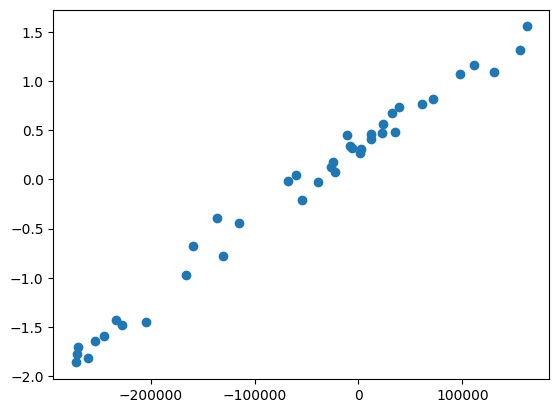

In [203]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(
    optimizer="sgd",
    loss="mse",
    metrics=["mse"]
)

h = model.fit(x_train,y_train_scaled,epochs=30,batch_size=10)
preds=model.predict(x_test)
plt.scatter(y_test,preds.flatten())